## EDA on Flight data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import zipfile

d:\python\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Features
    The various features of the cleaned dataset are explained below:
    1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
    2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
    3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
    4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
    5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
    6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
    7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
    8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
    9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
    10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
    11) Price: Target variable stores information of the ticket price.


In [2]:
df = pd.read_excel(r"D:\python\EDA\Data\flight_data\flight_price.xlsx")
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10683 non-null  str  
 1   Date_of_Journey  10683 non-null  str  
 2   Source           10683 non-null  str  
 3   Destination      10683 non-null  str  
 4   Route            10682 non-null  str  
 5   Dep_Time         10683 non-null  str  
 6   Arrival_Time     10683 non-null  str  
 7   Duration         10683 non-null  str  
 8   Total_Stops      10682 non-null  str  
 9   Additional_Info  10683 non-null  str  
 10  Price            10683 non-null  int64
dtypes: int64(1), str(10)
memory usage: 918.2 KB


In [3]:

df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
df['Date'] = df['Date_of_Journey'].str.split('/').str[0].astype('int32')
df['Month'] =df['Date_of_Journey'].str.split('/').str[1].astype('int32')
df['Year'] =df['Date_of_Journey'].str.split('/').str[2].astype('int32')

In [7]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [8]:
df.drop(columns=['Date_of_Journey'], inplace=True)

In [9]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [10]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10683 non-null  str  
 1   Source           10683 non-null  str  
 2   Destination      10683 non-null  str  
 3   Route            10682 non-null  str  
 4   Dep_Time         10683 non-null  str  
 5   Arrival_Time     10683 non-null  str  
 6   Duration         10683 non-null  str  
 7   Total_Stops      10682 non-null  str  
 8   Additional_Info  10683 non-null  str  
 9   Price            10683 non-null  int64
 10  Date             10683 non-null  int32
 11  Month            10683 non-null  int32
 12  Year             10683 non-null  int32
dtypes: int32(3), int64(1), str(9)
memory usage: 959.9 KB


In [11]:
# df['Arrival_hour'] = df['Arrival_Time'].str.split(':').str[0].astype('int16')
# df['Arrival_min'] = df['Arrival_Time'].str.split(':').str[1]

In [12]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019


In [13]:
df['Arrival_hour'] = df['Arrival_Time'].str.split().str[0].str.split(':').str[0].astype('int16')
df['Arrival_min'] = df['Arrival_Time'].str.split().str[0].str.split(':').str[1].astype('int16')


In [14]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15


In [15]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10683 non-null  str  
 1   Source           10683 non-null  str  
 2   Destination      10683 non-null  str  
 3   Route            10682 non-null  str  
 4   Dep_Time         10683 non-null  str  
 5   Arrival_Time     10683 non-null  str  
 6   Duration         10683 non-null  str  
 7   Total_Stops      10682 non-null  str  
 8   Additional_Info  10683 non-null  str  
 9   Price            10683 non-null  int64
 10  Date             10683 non-null  int32
 11  Month            10683 non-null  int32
 12  Year             10683 non-null  int32
 13  Arrival_hour     10683 non-null  int16
 14  Arrival_min      10683 non-null  int16
dtypes: int16(2), int32(3), int64(1), str(9)
memory usage: 1001.7 KB


In [16]:
df.drop(columns=['Arrival_Time'], inplace=True)

In [17]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10683 non-null  str  
 1   Source           10683 non-null  str  
 2   Destination      10683 non-null  str  
 3   Route            10682 non-null  str  
 4   Dep_Time         10683 non-null  str  
 5   Duration         10683 non-null  str  
 6   Total_Stops      10682 non-null  str  
 7   Additional_Info  10683 non-null  str  
 8   Price            10683 non-null  int64
 9   Date             10683 non-null  int32
 10  Month            10683 non-null  int32
 11  Year             10683 non-null  int32
 12  Arrival_hour     10683 non-null  int16
 13  Arrival_min      10683 non-null  int16
dtypes: int16(2), int32(3), int64(1), str(8)
memory usage: 918.2 KB


In [18]:
df['Departure_hrs'] = df['Dep_Time'].str.split(':').str[0].astype('int16')
df['Departure_min'] = df['Dep_Time'].str.split(':').str[1].astype('int16')
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hrs,Departure_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50


In [19]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10683 non-null  str  
 1   Source           10683 non-null  str  
 2   Destination      10683 non-null  str  
 3   Route            10682 non-null  str  
 4   Dep_Time         10683 non-null  str  
 5   Duration         10683 non-null  str  
 6   Total_Stops      10682 non-null  str  
 7   Additional_Info  10683 non-null  str  
 8   Price            10683 non-null  int64
 9   Date             10683 non-null  int32
 10  Month            10683 non-null  int32
 11  Year             10683 non-null  int32
 12  Arrival_hour     10683 non-null  int16
 13  Arrival_min      10683 non-null  int16
 14  Departure_hrs    10683 non-null  int16
 15  Departure_min    10683 non-null  int16
dtypes: int16(4), int32(3), int64(1), str(8)
memory usage: 959.9 KB


In [20]:
df.drop(columns=['Dep_Time'], inplace=True)

In [21]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10683 non-null  str  
 1   Source           10683 non-null  str  
 2   Destination      10683 non-null  str  
 3   Route            10682 non-null  str  
 4   Duration         10683 non-null  str  
 5   Total_Stops      10682 non-null  str  
 6   Additional_Info  10683 non-null  str  
 7   Price            10683 non-null  int64
 8   Date             10683 non-null  int32
 9   Month            10683 non-null  int32
 10  Year             10683 non-null  int32
 11  Arrival_hour     10683 non-null  int16
 12  Arrival_min      10683 non-null  int16
 13  Departure_hrs    10683 non-null  int16
 14  Departure_min    10683 non-null  int16
dtypes: int16(4), int32(3), int64(1), str(7)
memory usage: 876.5 KB


In [22]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hrs,Departure_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50


In [23]:
df['Total_Stops'].unique()

<StringArray>
['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops']
Length: 6, dtype: str

In [24]:
cond = [df['Total_Stops'] == 'non-stop',
        df['Total_Stops'] == '1 stop',
        df['Total_Stops'] == '2 stops',
        df['Total_Stops'] == '3 stops',
        df['Total_Stops'] == '4 stops',
        ]
choice = [0, 1, 2, 3, 4]

df['Total_Stops']= np.select(condlist=cond, choicelist=choice,default= 1)

In [25]:
df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hrs,Departure_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,2019,4,25,9,25


In [26]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10683 non-null  str  
 1   Source           10683 non-null  str  
 2   Destination      10683 non-null  str  
 3   Route            10682 non-null  str  
 4   Duration         10683 non-null  str  
 5   Total_Stops      10683 non-null  int64
 6   Additional_Info  10683 non-null  str  
 7   Price            10683 non-null  int64
 8   Date             10683 non-null  int32
 9   Month            10683 non-null  int32
 10  Year             10683 non-null  int32
 11  Arrival_hour     10683 non-null  int16
 12  Arrival_min      10683 non-null  int16
 13  Departure_hrs    10683 non-null  int16
 14  Departure_min    10683 non-null  int16
dtypes: int16(4), int32(3), int64(2), str(6)
memory usage: 876.5 KB


In [27]:
df['Total_Stops'] = df['Total_Stops'].astype('int16')
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10683 non-null  str  
 1   Source           10683 non-null  str  
 2   Destination      10683 non-null  str  
 3   Route            10682 non-null  str  
 4   Duration         10683 non-null  str  
 5   Total_Stops      10683 non-null  int16
 6   Additional_Info  10683 non-null  str  
 7   Price            10683 non-null  int64
 8   Date             10683 non-null  int32
 9   Month            10683 non-null  int32
 10  Year             10683 non-null  int32
 11  Arrival_hour     10683 non-null  int16
 12  Arrival_min      10683 non-null  int16
 13  Departure_hrs    10683 non-null  int16
 14  Departure_min    10683 non-null  int16
dtypes: int16(5), int32(3), int64(1), str(6)
memory usage: 813.9 KB


In [28]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hrs,Departure_min


In [29]:
df.drop(columns=['Route'], inplace=True)
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hrs,Departure_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,1,5,2019,13,15,5,50


In [30]:
df['Duration_hrs'] = df['Duration'].str.split().str[0].str.split('h').str[0].str.split('m').str[0].astype(np.int8)
df['Duration_min'] = df['Duration'].str.split().str[1].str.split('m').str[0]
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hrs,Departure_min,Duration_hrs,Duration_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882,9,6,2019,4,25,9,25,19,NaN
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302,1,3,2019,21,35,16,50,4,45


In [31]:
#Converting object column containg nan to interger without getting errors
df['Duration_min'] = pd.to_numeric(df['Duration_min'], errors='coerce')



In [32]:
df['Duration_min'].isna()
df['Duration_min'].median()

np.float64(30.0)

In [33]:
df3 = df[:]

In [34]:
df['Duration_min'] = np.select(condlist= [df['Duration_min'].isna()], choicelist= [df['Duration_min'].median()], default=df['Duration_min'])
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hrs,Departure_min,Duration_hrs,Duration_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,24,3,2019,1,10,22,20,2,50.0
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,1,5,2019,13,15,5,50,7,25.0
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882,9,6,2019,4,25,9,25,19,30.0
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218,12,5,2019,23,30,18,5,5,25.0
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302,1,3,2019,21,35,16,50,4,45.0


In [35]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encode = OneHotEncoder()
df1 = pd.DataFrame(encode.fit_transform(df[['Airline', 'Source', 'Destination', 'Additional_Info']]).toarray(), columns=encode.get_feature_names_out())
df1 = df1.astype(np.int8)
df1.info()

<class 'pandas.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 33 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Airline_Air Asia                              10683 non-null  int8 
 1   Airline_Air India                             10683 non-null  int8 
 2   Airline_GoAir                                 10683 non-null  int8 
 3   Airline_IndiGo                                10683 non-null  int8 
 4   Airline_Jet Airways                           10683 non-null  int8 
 5   Airline_Jet Airways Business                  10683 non-null  int8 
 6   Airline_Multiple carriers                     10683 non-null  int8 
 7   Airline_Multiple carriers Premium economy     10683 non-null  int8 
 8   Airline_SpiceJet                              10683 non-null  int8 
 9   Airline_Trujet                                10683 non-null  int8 
 10  Airline_Vistara      

In [37]:
df = pd.concat([df,df1], axis=1)
df.drop(df[['Airline', 'Source', 'Destination', 'Additional_Info']], axis=1, inplace=True)

In [38]:
df.drop(columns=['Duration'], inplace=True)
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 44 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Total_Stops                                   10683 non-null  int16  
 1   Price                                         10683 non-null  int64  
 2   Date                                          10683 non-null  int32  
 3   Month                                         10683 non-null  int32  
 4   Year                                          10683 non-null  int32  
 5   Arrival_hour                                  10683 non-null  int16  
 6   Arrival_min                                   10683 non-null  int16  
 7   Departure_hrs                                 10683 non-null  int16  
 8   Departure_min                                 10683 non-null  int16  
 9   Duration_hrs                                  10683 non-null  int8   
 1

In [39]:
df['Duration_min'] = df['Duration_min'].astype(np.int16)
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 44 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Total_Stops                                   10683 non-null  int16
 1   Price                                         10683 non-null  int64
 2   Date                                          10683 non-null  int32
 3   Month                                         10683 non-null  int32
 4   Year                                          10683 non-null  int32
 5   Arrival_hour                                  10683 non-null  int16
 6   Arrival_min                                   10683 non-null  int16
 7   Departure_hrs                                 10683 non-null  int16
 8   Departure_min                                 10683 non-null  int16
 9   Duration_hrs                                  10683 non-null  int8 
 10  Duration_min         

In [40]:
df.dtypes.unique()

array([dtype('int16'), dtype('int64'), dtype('int32'), dtype('int8')],
      dtype=object)

## Checking correlation

In [ ]:
df['Duration_hrs'].corr(df['Price'])

#Since ther is only one value present in year columns, we are dropping 'Year' column from data
df.drop(columns=['Year'], inplace=True)


In [55]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Total_Stops                                   10683 non-null  int16
 1   Price                                         10683 non-null  int64
 2   Date                                          10683 non-null  int32
 3   Month                                         10683 non-null  int32
 4   Arrival_hour                                  10683 non-null  int16
 5   Arrival_min                                   10683 non-null  int16
 6   Departure_hrs                                 10683 non-null  int16
 7   Departure_min                                 10683 non-null  int16
 8   Duration_hrs                                  10683 non-null  int8 
 9   Duration_min                                  10683 non-null  int16
 10  Airline_Air Asia     

In [51]:
corr_target = df.corr(numeric_only=True)['Price'].drop('Price')
top_corr = corr_target.abs().sort_values(ascending=False).head(10)


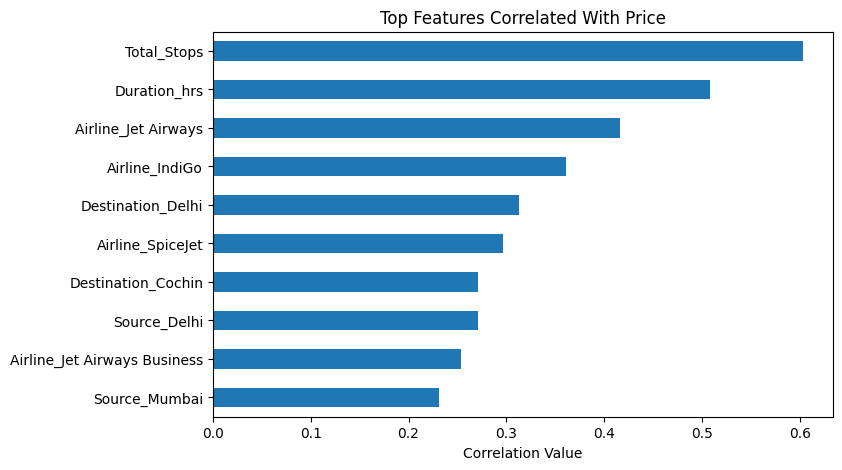

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
top_corr.sort_values().plot(kind='barh')
plt.title('Top Features Correlated With Price')
plt.xlabel('Correlation Value')
plt.show()


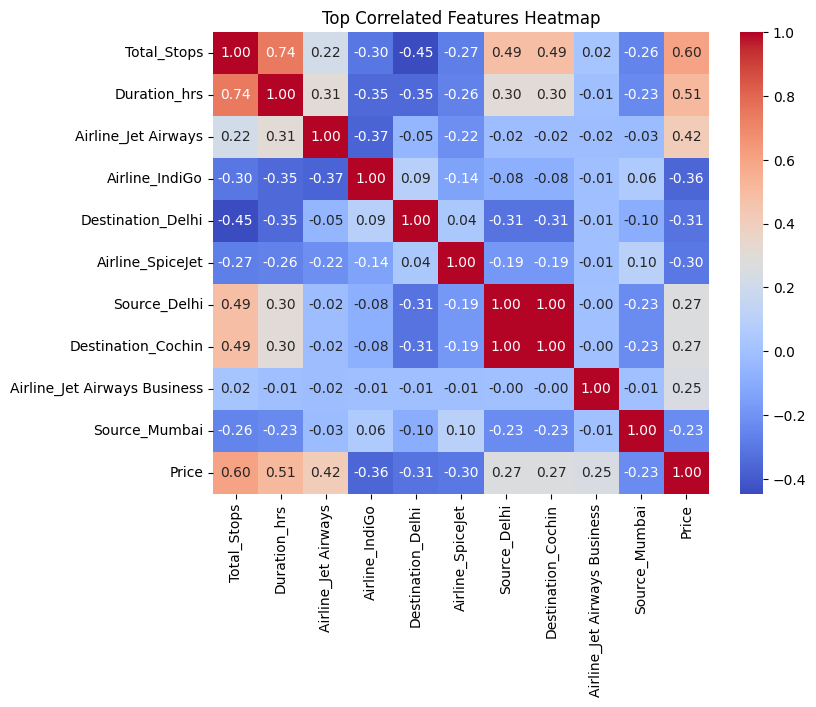

In [53]:
import seaborn as sns

top_features = top_corr.index.tolist()

plt.figure(figsize=(8,6))
sns.heatmap(df[top_features + ['Price']].corr(),
            annot=True,
            cmap='coolwarm',
            fmt='.2f')
plt.title('Top Correlated Features Heatmap')
plt.show()


## Using Tree based model

In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [58]:
model = DecisionTreeRegressor()

In [59]:
X = df.drop('Price', axis = 1)
y = df['Price']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [64]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_l

In [131]:
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error, mean_squared_error

y_pred = dt.predict(X_test)

In [132]:
MAE = mean_absolute_error(y_test, y_pred)
RMSE = root_mean_squared_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
r_score = r2_score(y_test, y_pred)

In [133]:
print(f"Model evaluation score MAE: {MAE}, RMSE: {RMSE}, MSLE: {MSE}, r2_score: {r_score}")

Model evaluation score MAE: 712.225471845266, RMSE: 1928.7698147786289, MSLE: 3720152.998401186, r2_score: 0.8242223131234536


In [134]:
print("Train R2:", dt.score(X_train, y_train))
print("Test R2:", dt.score(X_test, y_test))

Train R2: 0.9955485089136377
Test R2: 0.8242223131234536


## Hyperparameter tunning

In [135]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth':[3, 5, 10, None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

grid = GridSearchCV(
        DecisionTreeRegressor(random_state=42),
        params,
        cv=5,
        scoring='r2'

)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_

In [136]:
importance = pd.Series(best_model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).head(10)

Duration_hrs                                   0.457950
Additional_Info_In-flight meal not included    0.083983
Date                                           0.081577
Airline_Jet Airways                            0.065874
Airline_Jet Airways Business                   0.065252
Month                                          0.048461
Total_Stops                                    0.032876
Arrival_hour                                   0.024138
Source_Banglore                                0.020904
Arrival_min                                    0.019508
dtype: float64

In [137]:
be_pred = best_model.predict(X_test)

be_MAE = mean_absolute_error(y_test, be_pred)
be_RMSE = root_mean_squared_error(y_test, be_pred)
be_MSE = mean_squared_error(y_test, be_pred)
be_r_score = r2_score(y_test, be_pred)


In [138]:
print(f"Model evaluation score MAE: {be_MAE}, RMSE: {be_RMSE}, MSLE: {be_MSE}, R2: {be_r_score}")

Model evaluation score MAE: 757.7778631964408, RMSE: 1821.9633731046297, MSLE: 3319550.5329348003, R2: 0.8431508289041181


In [139]:
print("Train R2:", best_model.score(X_train, y_train))
print("Test R2:", best_model.score(X_test, y_test))

Train R2: 0.945612277627407
Test R2: 0.8431508289041181


## Applying Random_Forest

In [140]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [141]:
rf_pred = rf.predict(X_test)

In [142]:

rf_MAE = mean_absolute_error(y_test, rf_pred)
rf_RMSE = root_mean_squared_error(y_test, rf_pred)
rf_MSE = mean_squared_error(y_test, rf_pred)
rf_r_score = r2_score(y_test, rf_pred)

In [143]:
print(f"Model evaluation score MAE: {rf_MAE}, RMSE: {rf_RMSE}, MSE: {rf_MSE}, R2: {rf_r_score}")

Model evaluation score MAE: 652.1479139609546, RMSE: 1658.4963015689525, MSE: 2750609.9823178938, R2: 0.8700333399193071


In [144]:
print("Train R2:", rf.score(X_train, y_train))
print("Test R2:", rf.score(X_test, y_test))

Train R2: 0.9828422399699833
Test R2: 0.8700333399193071


In [145]:
importance = pd.Series(rf.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).head(10)

Duration_hrs                                   0.431100
Date                                           0.091894
Additional_Info_In-flight meal not included    0.076561
Airline_Jet Airways Business                   0.063232
Airline_Jet Airways                            0.062919
Month                                          0.046477
Total_Stops                                    0.030703
Arrival_hour                                   0.028103
Departure_hrs                                  0.023430
Airline_Multiple carriers                      0.019672
dtype: float64

## Trying Xgboost

In [119]:
from xgboost  import XGBRegressor

xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)

xgb.fit(X_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes

In [120]:
xg_pred = xgb.predict(X_test)

In [146]:
xg_MAE = mean_absolute_error(y_test, xg_pred)
xg_RMSE = root_mean_squared_error(y_test, xg_pred)
xg_MSE = mean_squared_error(y_test, xg_pred)
xg_r_score = r2_score(y_test, xg_pred)
print(f"Model evaluation score MAE: {xg_MAE}, RMSE: {xg_RMSE}, MSE: {xg_MSE}, R2: {xg_r_score}")

Model evaluation score MAE: 799.7011108398438, RMSE: 1496.0592041015625, MSE: 2238193.25, R2: 0.8942450881004333


## Lightgbm

In [127]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    random_state=42
)

lgbm.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001633 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 190
[LightGBM] [Info] Number of data points in the train set: 8546, number of used features: 31
[LightGBM] [Info] Start training from score 9074.827873


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.05
,n_estimators,500
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [147]:
lg_pred = lgbm.predict(X_test)

In [149]:
lg_MAE = mean_absolute_error(y_test, lg_pred)
lg_RMSE = root_mean_squared_error(y_test, lg_pred)
lg_MSE = mean_squared_error(y_test, lg_pred)
lg_r_score = r2_score(y_test, lg_pred)
print(f"Model evaluation score MAE: {lg_MAE}, RMSE: {lg_RMSE}, MSE: {lg_MSE}, R2: {lg_r_score}")

Model evaluation score MAE: 790.7932049256018, RMSE: 1513.4709179999868, MSE: 2290594.2196317227, R2: 0.8917691413034107


In [162]:
data = {
            'model' : ['DecisionTreeRegressor', 'Random_forest', 'Xg_boost', 'Light_gbm'],
             'R2_score' : [be_r_score, rf_r_score, xg_r_score, lg_r_score],
             'RMSE' : [be_RMSE, rf_RMSE, xg_RMSE, lg_RMSE]}
pd.DataFrame(data)

,model,R2_score,RMSE
0,DecisionTreeRegressor,0.843151,1821.963373
1,Random_forest,0.870033,1658.496302
2,Xg_boost,0.894245,1496.059204
3,Light_gbm,0.891769,1513.470918


## Tunning base models